In [16]:
maze = [[-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,],
        [-1, 0, 0, 0,-1, 0, 0, 0,-1,-1, 0,-1,-1, 0, 0, 0, 0, 0, 0, 0, 0,-1,],
        [ 0, 0, 0, 0, 0, 0,-1, 0, 0, 0, 0, 0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,],
        [-1, 0,-1, 0, 0, 0, 0,-1,-1, 0, 0,-1,-1,-1,-1, 0,-1,-1,-1, 0,-1,-1,],
        [-1, 0,-1, 0, 0, 0,-1, 0,-1, 0,-1,-1, 0, 0, 0, 0,-1,-1,-1, 0, 0,-1,],
        [-1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,-1,-1, 0, 0,-1,-1, 0, 0,-1, 0,-1,],
        [-1,-1,-1,-1,-1, 0,-1, 0,-1, 0, 0, 0, 0, 0, 0,-1,-1, 0, 0,-1, 0,-1,],
        [-1,-1,-1,-1,-1, 0,-1,-1,-1, 0, 0,-1, 0,-1, 0, 0,-1,-1, 0, 0, 0,-1,],
        [-1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,-1, 0,-1, 0, 9,-1, 0,-1, 0, 0,-1,],
        [-1,-1,-1,-1,-1, 0,-1, 0, 0,-1, 0,-1, 0,-1, 0, 0, 0, 0, 0,-1, 0,-1,],
        [-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,]]

The above maze is simple. We have obstacles = -1, 0 is an unexplored path, and 9 is the starting point. If we hit the path we want to take, we can give it a value of 3. 

We will start at *9* and move until we are outside of the bounds of the maze. Getting the bounds should be easy enough, just use the shape function built into numpy arrays. So if our position $x == 0$ or $y==0$, or $x = x_{bound}$ or $y = y_{bound}$. Lots of options. 


[[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1  0  0  0 -1  0  0  0 -1 -1  0 -1 -1  0  0  0  0  0  0  0  0 -1]
 [ 0  0  0  0  0  0 -1  0  0  0  0  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1  0 -1  0  0  0  0 -1 -1  0  0 -1 -1 -1 -1  0 -1 -1 -1  0 -1 -1]
 [-1  0 -1  0  0  0 -1  0 -1  0 -1 -1  0  0  0  0 -1 -1 -1  0  0 -1]
 [-1  0  0  0  0  0  0  0  0  0  0 -1 -1  0  0 -1 -1  0  0 -1  0 -1]
 [-1 -1 -1 -1 -1  0 -1  0 -1  0  0  0  0  0  0 -1 -1  0  0 -1  0 -1]
 [-1 -1 -1 -1 -1  0 -1 -1 -1  0  0 -1  0 -1  0  0 -1 -1  0  0  0 -1]
 [-1  0  0  0  0  0  0  0  0  0  0 -1  0 -1  0  9 -1  0 -1  0  0 -1]
 [-1 -1 -1 -1 -1  0 -1  0  0 -1  0 -1  0 -1  0  0  0  0  0 -1  0 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]]


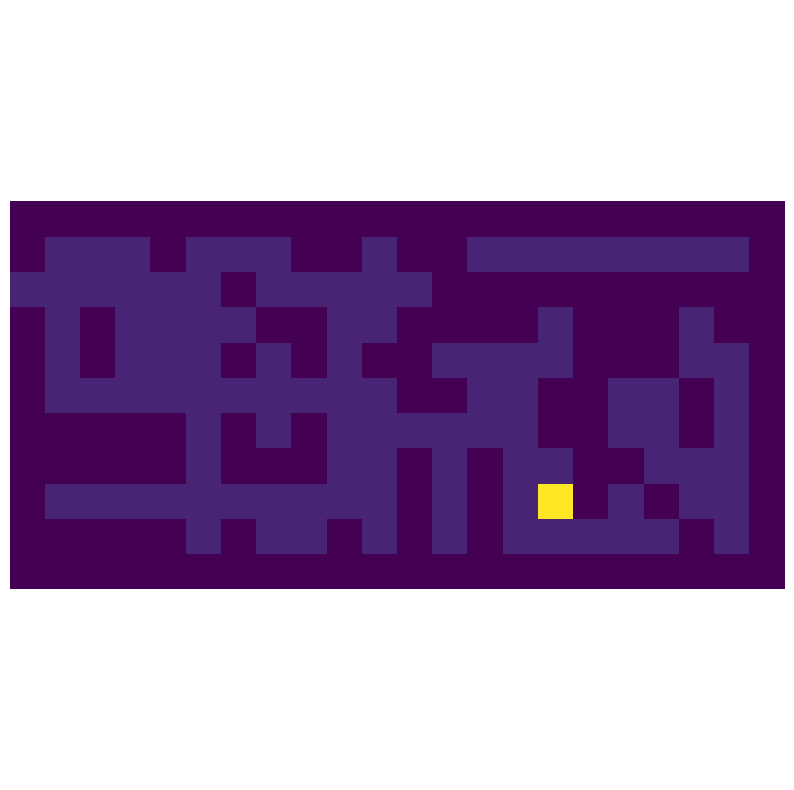

In [17]:
import numpy as np
import matplotlib.pyplot as plt

import time
from IPython.display import display, clear_output

mmaze = np.array(maze)
y_b, x_b = mmaze.shape
print(mmaze)
plt.pcolor(mmaze[-1::-1,:])
plt.axis('equal')
plt.axis('off')
plt.show()

In [18]:
y, x = np.where(mmaze == 9)
#Get the starting position

In [19]:
fig = plt.figure()

def move(maze, y, x):
    global fig
    #  run into an obstacle, return false
    if maze[y, x] == -1 :
        return False
    #  run into a square explored, on the path, or dead end
    if maze[y, x] == 1 or maze[y, x] == 2 or maze[y, x] == 3:
        return False
    # Success, an outside edge not occupied by an obstacle
    if x==0 or y == 0 or x >= maze.shape[1] or y >= maze.shape[0]:
        try: 
            maze[y,x] = 3
        except:
            print("YOU'RE OUTSIDE!")
        return True
    maze[y,x] = 1

    # Otherwise, use logical short circuiting to try each
    # direction in turn (if needed)
    found = move(maze, y, x+1) or \
          move(maze, y-1, x) or \
          move(maze, y, x-1) or \
          move(maze, y+1, x)
    plt.pcolor(maze[-1::-1,:])
    plt.axis('equal')
    plt.axis('off')

    display(fig)    
    clear_output(wait = True)
    plt.pause(1e-1)
    if found:
        maze[y,x] = 3 # This is the path we wanna follow
    else:
        maze[y,x] = 2 #dead end
    return found

<Figure size 1000x1000 with 0 Axes>

Lets run our code on the maze code above and see what happens!



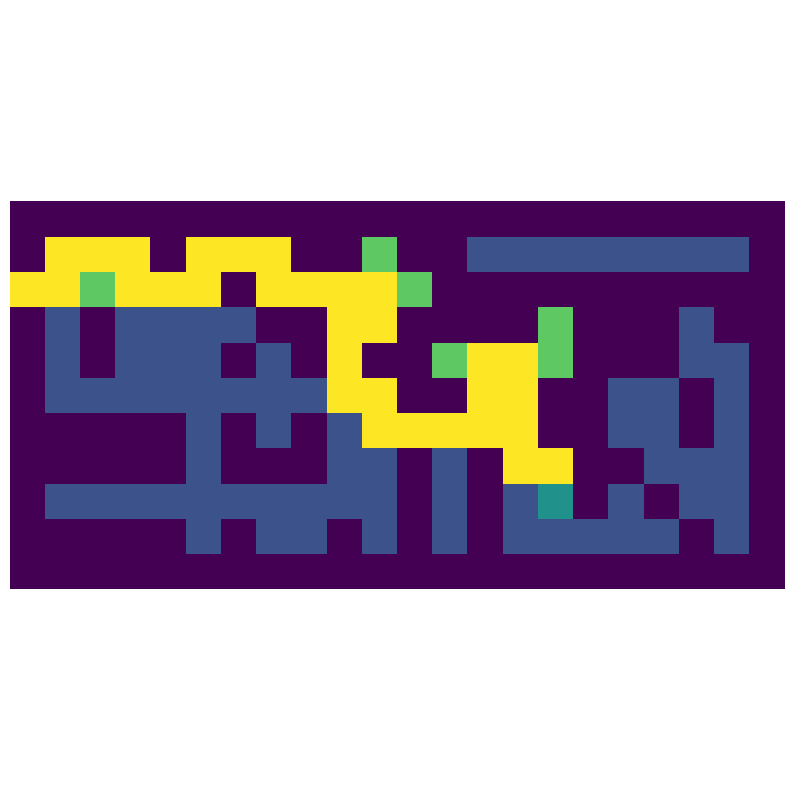

True

In [20]:
mmaze = np.array(maze)
y, x = np.where(mmaze == 9)
move(mmaze,y,x)

The cells in the map above have *Moore* connectivity. This means from your postion you can travel *north, south, east, or west*. 

A *Neumann* neighborhood adds in the four additional directions *north-east, south-east, south-west, and north-west*. How can you modify the above function to incorporate the *Neumann* neighborhood?

**Task 1 (30 points)**

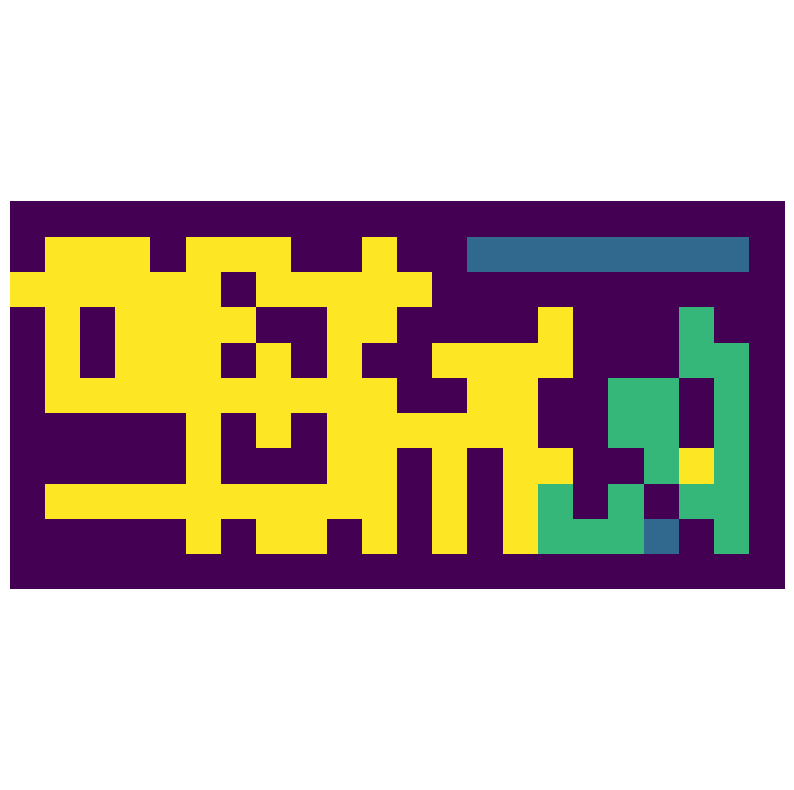

False

In [21]:
def move_neu(maze, x, y):
    global fig

    directions = [(0, 1), (-1, 0), (0, -1), (1, 0), (-1, 1), (-1, -1), (1, -1), (1, 1)]

    for dx, dy in directions:
        new_x, new_y = x + dx, y + dy

        if 0 <= new_x < maze.shape[1] and 0 <= new_y < maze.shape[0] and maze[new_y, new_x] == 0:
            maze[y, x] = 1
            plt.pcolor(maze[-1::-1, :])
            plt.axis('equal')
            plt.axis('off')
            display(fig)
            clear_output(wait=True)
            plt.pause(1e-1)
            if move_neu(maze, new_x, new_y):
                return True

    maze[y, x] = 2
    return False

mmaze = np.array(maze)
y, x = np.where(mmaze == 9)
move_neu(mmaze, x[0], y[0])

mmaze = np.array((maze))
move_neu(mmaze,x,y)

** Task 2 (20 Points) ** 
Make another maze. Programmatically, your by modifying the above maze. 

Alter the order of moves in the move function and measure the time it takes to solve the maze. Is there an optimal order of operations?

***Hint: use %timeit and kill the plotting ***

In [22]:
def move_rdlu(maze, y, x):

    #  run into an obstacle, return false
    if maze[y, x] == -1 :
        return False
    #  run into a square explored, on the path, or dead end
    if maze[y, x] == 1 or maze[y, x] == 2 or maze[y, x] == 3:
        return False
    # Success, an outside edge not occupied by an obstacle
    if x==0 or y == 0 or x >= maze.shape[1] or y >= maze.shape[0]:
        try: 
            maze[y,x] = 3
        except:
            print("YOU'RE OUTSIDE!")
        return True
    maze[y,x] = 1

    # Otherwise, use logical short circuiting to try each
    # direction in turn (if needed)
    found = move_rdlu(maze, y, x + 1) or \
          move_rdlu(maze, y + 1, x) or \
          move_rdlu(maze, y, x - 1) or \
          move_rdlu(maze, y - 1, x)    
    if found:
        maze[y,x] = 3 # This is the path we wanna follow
    else:
        maze[y,x] = 2 #dead end
    return found

%timeit move_rdlu(mmaze,y,x)

5.13 µs ± 15.9 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


** Task 3 (50 Points) ** 

Plagarized from a class on Haskel at Stanford [http://nifty.stanford.edu/2018/stephenson-mondrian-art/Handout_Fall.pdf] We are not doing the same problem, but something similar. 

Piet Mondrian (March 7, 1872 – February 1, 1944) was a Dutch painter who created numerous famous
paintings in the early half of the previous century that consisted of a white background, prominent black
horizontal and vertical lines, and regions colored with red, yellow and blue. Three examples are shown
below:
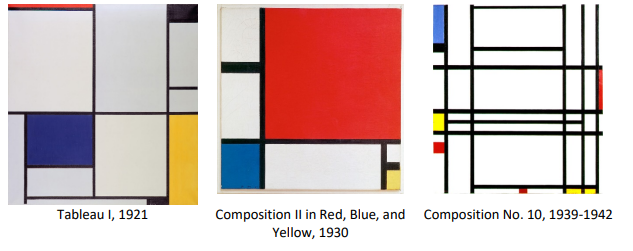

Below is included some boiler plate code to setup a plot employing patches of rectangles onto a 1000 x 800 pixel image. 

You need to write a code which will recursively divide the *Canvas* and *paint* each portion of the *canvas*. 

It is your choice when to stop dividing the domain and how to paint each of the sections. 

You do not need to limit your color pallette or how far down you recurse (though sub pixel division will not produce a change). 

In order to get full marks you need to define a series of functions which will recursively produce some **art**. 

Thorough comments throughout your code will have a large effect on your final grade. Clearly mark out your base case for recursion. Define any design choices explicitly (i.e. if a sub-divided region is to narrow it merges with a neighbor). If you use a **magic-number**, state why. If you are implementing a random number, why? If using RNG, can you seed it and consistently recreate your art? 

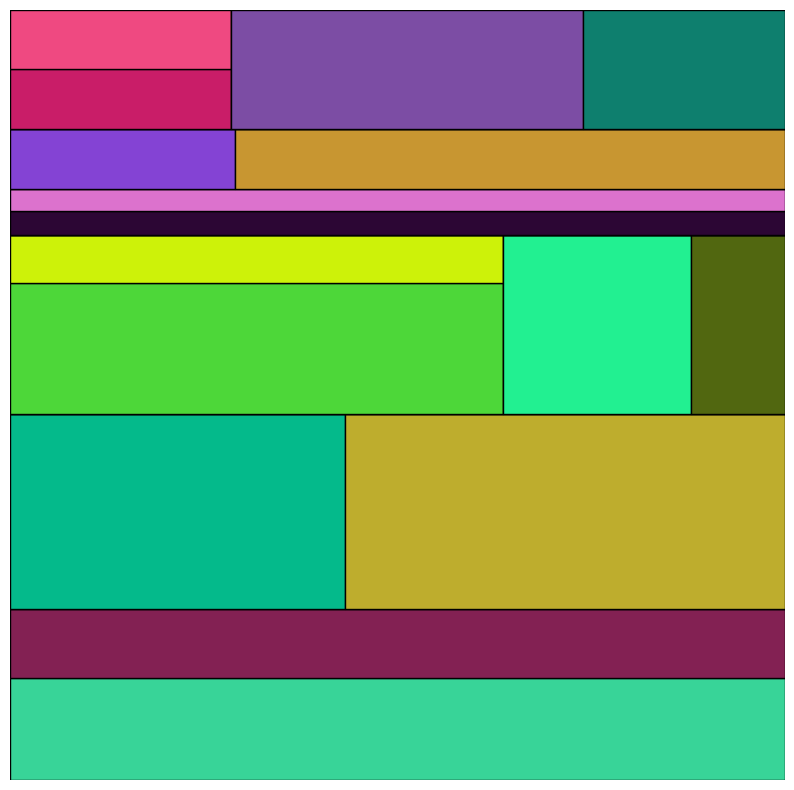

In [60]:
# import random
# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib.patches import Rectangle

# from IPython.display import display, clear_output
# plt.rcParams["figure.figsize"] = (10,10)
# fig = plt.figure()
# domain = (1000,800)
# plt.xlim(0,domain[0])
# plt.ylim(0,domain[1])
# plt.axis('off')
# ax = fig.gca()

# rects = [Rectangle((50, 100), 400, 320, linewidth=1, edgecolor='r', facecolor='r'),
#          Rectangle((125, 500), 100, 200, linewidth=1, edgecolor='k', facecolor='g'),
#          Rectangle((625, 10), 290, 50, linewidth=11, edgecolor='k', facecolor='b'),
#          Rectangle((725, 600), 75, 150, linewidth=5, edgecolor='g', facecolor='y')]
# [ax.add_patch(rect) for rect in rects]

# plt.show()

import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

plt.rcParams["figure.figsize"] = (10, 10)
fig = plt.figure()
domain = (0, 0, 1000, 800)
plt.xlim(0, domain[2])
plt.ylim(0, domain[3])
plt.axis('off')
ax = fig.gca()

def generate_art(ax, domain, depth):
    x, y, width, height = domain
    
    # Base case to stop dividing
    if depth <= 0 or width < 10 or height < 10:
        return

    # Random color for the rect
    facecolor = np.random.rand(3)  # Random RGB color

    # Add the current rect to plot
    rect = Rectangle((x, y), width, height, linewidth=1, edgecolor='k', facecolor=facecolor)
    ax.add_patch(rect)

    # Randomly choose whether to divide horizontally or vertically
    if random.random() < 0.5:
        # Divide horizontally
        split = random.randint(int(0.25 * height), int(0.75 * height))
        generate_art(ax, (x, y, width, split), depth - 1)
        generate_art(ax, (x, y + split, width, height - split), depth - 1)
    else:
        # Divide vertically
        split = random.randint(int(0.25 * width), int(0.75 * width))
        generate_art(ax, (x, y, split, height), depth - 1)
        generate_art(ax, (x + split, y, width - split, height), depth - 1)

# call to generate_art to create the art with a depth of 5
generate_art(ax, domain, depth=5)

# display the art
plt.show()

# plt.savefig('GoodArt.png')

In [24]:
puz = [ [2,0,1,0,6,0,9,3,0],
[0,4,6,0,7,0,0,8,2],
[0,0,8,2,9,1,0,6,0],
[3,0,2,8,0,0,0,6,9],
[0,1,0,3,2,0,7,0,0],
[6,8,5,7,0,0,0,0,0],
[8,6,0,0,0,5,3,0,0],
[0,9,0,6,0,0,0,0,4],
[0,0,0,0,0,7,8,1,0]]

In [25]:
def print_puz(puzzle):
    for row in puzzle:
        for square in row:
            if square == 0:
                print(f"* ", end = "")
            else:
                print(f"{square} ",end = "")
        print()

In [26]:
print_puz(puz)

2 * 1 * 6 * 9 3 * 
* 4 6 * 7 * * 8 2 
* * 8 2 9 1 * 6 * 
3 * 2 8 * * * 6 9 
* 1 * 3 2 * 7 * * 
6 8 5 7 * * * * * 
8 6 * * * 5 3 * * 
* 9 * 6 * * * * 4 
* * * * * 7 8 1 * 


In [27]:
def check(y, x, n):
    #check current column
    for i in range(0,9):
        if puz[y][i] == n:
            return False
    for i in range(0,9):
        if puz[i][x] == n:
            return False
    xb = (x//3) * 3
    yb = (y//3) * 3
    for i in range(0,3):
        for j in range(0, 3):
            if puz[yb+i][xb+j] == n:
                return False
    return True

print(puz[1][2])

y,x = 0, 1
for n in range(1,10):
    works = check(y, x, n)
    print(f"{n} {works}")

6
1 False
2 False
3 False
4 False
5 True
6 False
7 True
8 False
9 False


In [28]:
def solve():
    global puz
    for y in range (0,9):
        for x in range (0,9):
            if puz[y][x] == 0:
                for n in range (1,10):
                    if check(x, y, n):
                        puz[y][x] = n
                        solve()
                        puz[y][x] = 0
                return
    print_puz(puz)
    input('More Solutions?')

In [29]:
solve()

notes:
0,0 0,1 0,2
1,0 1,1 1,2
2,0 2,1 2,2       y//3, x//3